In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import MetaTrader5 as mt5
import pytz
from datetime import datetime, timedelta

In [3]:
# Initialize connection to MetaTrader 5
if not mt5.initialize():
    print("initialize() failed, error code =", mt5.last_error())
    quit()

In [4]:
# For example, if the list shows "XAU/USD", then use that:
symbol = "XAUUSD"  # Adjust based on what you see on your terminal

# Attempt to select the symbol in the Market Watch
if not mt5.symbol_select(symbol, True):
    print("Failed to select symbol", symbol)
    mt5.shutdown()
    quit()

In [5]:
import MetaTrader5 as mt5
import pandas as pd
from datetime import datetime, timedelta

# Initialize MT5
if not mt5.initialize():
    print("Initialize failed:", mt5.last_error())
    quit()

symbol = "XAUUSD"
timeframe = mt5.TIMEFRAME_M1
start_date = datetime(2020, 1, 1)
end_date = datetime.now()

chunk_minutes = 50000  # safe limit to avoid cutoff
current_to = end_date
all_data = []

while current_to > start_date:
    current_from = current_to - timedelta(minutes=chunk_minutes)
    if current_from < start_date:
        current_from = start_date

    rates = mt5.copy_rates_range(symbol, timeframe, current_from, current_to)
    
    if rates is None or len(rates) == 0:
        print(f"⚠️ No data from {current_from} to {current_to}")
        break

    df = pd.DataFrame(rates)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    all_data.append(df)

    print(f"✅ Downloaded from {current_from} to {current_to} - {len(df)} rows")

    current_to = current_from - timedelta(minutes=1)

# Combine all data
data = pd.concat(all_data)
data.sort_values('time', inplace=True)
data.reset_index(drop=True, inplace=True)

# Save to CSV
data.to_csv("XAUUSD_M1_Exness_2020_to_now.csv", index=False)

# Shutdown
mt5.shutdown()
print("✅ All done! Data saved to CSV.")


✅ Downloaded from 2025-05-19 18:03:49.009648 to 2025-06-23 11:23:49.009648 - 33607 rows
✅ Downloaded from 2025-04-15 00:42:49.009648 to 2025-05-19 18:02:49.009648 - 32599 rows
✅ Downloaded from 2025-03-11 07:21:49.009648 to 2025-04-15 00:41:49.009648 - 33892 rows
✅ Downloaded from 2025-02-04 14:00:49.009648 to 2025-03-11 07:20:49.009648 - 1 rows
✅ Downloaded from 2024-12-31 20:39:49.009648 to 2025-02-04 13:59:49.009648 - 1 rows
✅ Downloaded from 2024-11-27 03:18:49.009648 to 2024-12-31 20:38:49.009648 - 1 rows
✅ Downloaded from 2024-10-23 09:57:49.009648 to 2024-11-27 03:17:49.009648 - 1 rows
✅ Downloaded from 2024-09-18 16:36:49.009648 to 2024-10-23 09:56:49.009648 - 1 rows
✅ Downloaded from 2024-08-14 23:15:49.009648 to 2024-09-18 16:35:49.009648 - 1 rows
✅ Downloaded from 2024-07-11 05:54:49.009648 to 2024-08-14 23:14:49.009648 - 1 rows
✅ Downloaded from 2024-06-06 12:33:49.009648 to 2024-07-11 05:53:49.009648 - 1 rows
✅ Downloaded from 2024-05-02 19:12:49.009648 to 2024-06-06 12:32

In [12]:
# Define the time range for tick data: past day in this example
# utc_to = datetime.utcnow()
# utc_from = utc_to - timedelta(days=1)

# Define the time range for tick data: entire year 2025
utc_from = datetime(2024, 1, 1)
utc_to = datetime(2020, 12, 31, 23, 59, 59)

# Retrieve tick data for the symbol (all tick types)
ticks = mt5.copy_ticks_range(symbol, utc_from, utc_to, mt5.COPY_TICKS_ALL)
if ticks is None or len(ticks) == 0:
    print("No tick data retrieved for", symbol)
    mt5.shutdown()
    quit()

# Convert tick data into a Pandas DataFrame
ticks_df = pd.DataFrame(ticks)

# Check available columns for timestamp information
print("Tick data columns:", ticks_df.columns)

No tick data retrieved for XAUUSD
Tick data columns: Index(['time', 'bid', 'ask', 'last', 'volume', 'time_msc', 'flags',
       'volume_real'],
      dtype='object')


In [13]:
# Convert the timestamp to a datetime format:
if 'time' in ticks_df.columns:
    ticks_df['time'] = pd.to_datetime(ticks_df['time'], unit='s')
elif 'time_msc' in ticks_df.columns:
    ticks_df['time'] = pd.to_datetime(ticks_df['time_msc'], unit='ms')
else:
    print("No recognizable time column found in tick data.")
    mt5.shutdown()
    quit()

# Set the datetime column as the index
ticks_df.set_index('time', inplace=True)

# Display the first few rows of the DataFrame
print(ticks_df.head())

# Shut down the connection to MetaTrader 5
# mt5.shutdown()

Empty DataFrame
Columns: [bid, ask, last, volume, time_msc, flags, volume_real]
Index: []


In [14]:
# Retrieve 5-minute bar data for the symbol
rates = mt5.copy_rates_from(symbol, mt5.TIMEFRAME_M5, utc_to, 50000)
if rates is None or len(rates) == 0:
    print("No rate data retrieved for", symbol)
    mt5.shutdown()
    quit()


No rate data retrieved for XAUUSD


In [ ]:
# Convert rate data into a Pandas DataFrame
rates_df = pd.DataFrame(rates)

# Convert the timestamp to a datetime format
rates_df['time'] = pd.to_datetime(rates_df['time'], unit='s')

# Set the datetime column as the index
rates_df.set_index('time', inplace=True)

# Display the first few rows of the DataFrame
print(rates_df.head())

# Shut down the connection to MetaTrader 5
mt5.shutdown()


KeyError: 'time'

: 

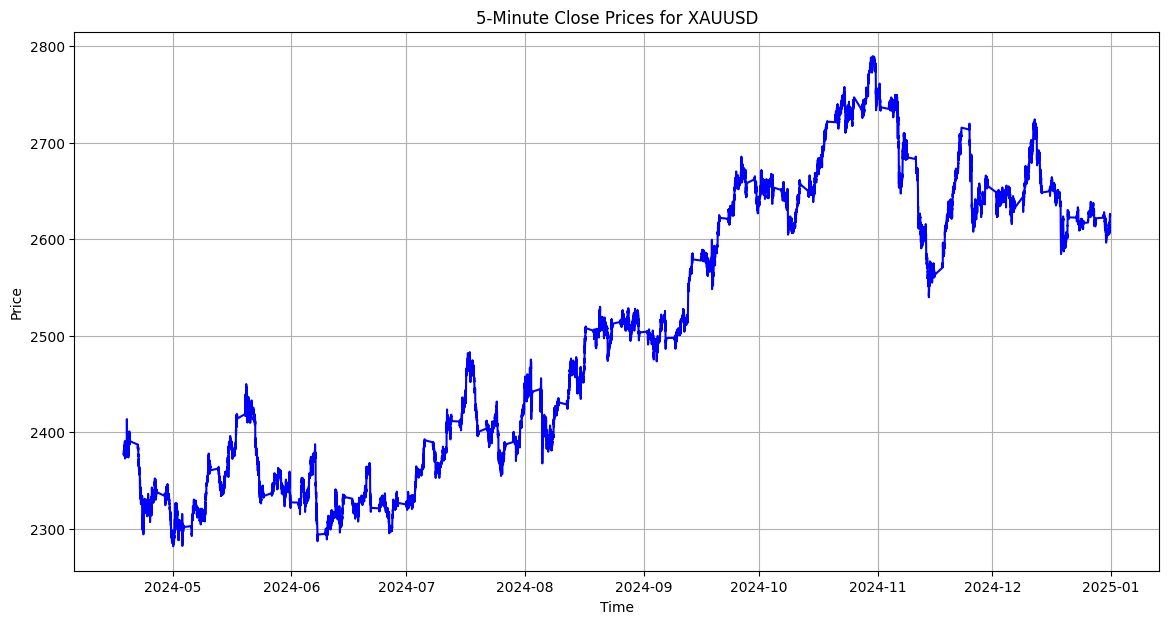

In [ ]:
# Plot the 5-minute close prices
plt.figure(figsize=(14, 7))
plt.plot(rates_df.index, rates_df['close'], label='Close Price', color='blue')
plt.title(f'5-Minute Close Prices for {symbol}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid()